# Correlation to Network graph

This code is an expriment to see the important factor in the dataset with the graph generated from the correlation of factors with eachother. criteria is set to semove the edges with low correlation.

In [168]:
import numpy as np
import pandas as pd
import geopandas as gdp
import math
import networkx as nx
import plotly.graph_objects as go

### User Variables:

In [169]:
# path to the dataset :

dataset_path = r'Dataset.csv'

'''
Method of correlation:
    1 : pearson : standard correlation coefficient
    2 : kendall : Kendall Tau correlation coefficient
    3 : spearman : Spearman rank correlation
'''
# choose from list above ↑
user_method = 1



In [170]:
correlation_methods = {1: 'pearson' , 2:'kendall', 3:'spearman' }
dataset = pd.read_csv(dataset_path)
dataset_correlation = dataset.corr(correlation_methods[user_method])
factors = list(dataset.columns.values)
del factors[0]
del factors[1]
origin = []
target = []
weight = []
edges = pd.DataFrame(columns=['origin', 'target', 'weight'])

In [171]:
for i in range(len(edges)):
    if edges.iloc[i]['weight']<0 :
        edges.drop(i , axis = 0)

In [172]:
counter = 0
for i in factors:
    for j in factors:
        edges.loc[counter] = [i , j, abs(dataset_correlation[i][j])]
        counter = counter + 1

In [173]:
G = nx.Graph()

In [174]:
for i in factors:
    G.add_node(i)
for i in range(len(edges)):
    G.add_weighted_edges_from(tuple(edges.iloc[i]))

ValueError: too many values to unpack (expected 3)

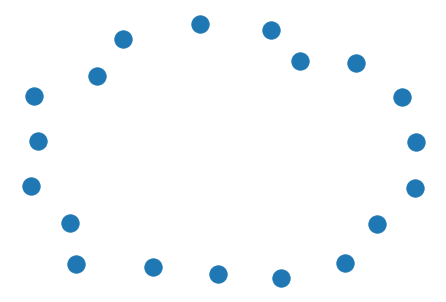

In [124]:
G.nodes()
nx.draw(G)


In [136]:
len(tuple(edges.iloc[1]))

3

In [162]:
edges

,origin,target,weight
0,Price_Ln,Price_Ln,1.000000
1,Price_Ln,Price_sqm_Ln,0.102992
2,Price_Ln,sqm,0.860356
3,Price_Ln,sqm_Ln,0.849540
4,Price_Ln,Age,0.176822
5,Price_Ln,Age_Ln,0.190923
6,Price_Ln,floor,0.104970
7,Price_Ln,floortotal,0.167869
8,Price_Ln,d_elevator,0.137289
9,Price_Ln,d_poor,0.194347


In [167]:
edges

,origin,target,weight
0,Price_Ln,Price_Ln,1.000000
1,Price_Ln,Price_sqm_Ln,0.102992
2,Price_Ln,sqm,0.860356
3,Price_Ln,sqm_Ln,0.849540
4,Price_Ln,Age,0.176822
5,Price_Ln,Age_Ln,0.190923
6,Price_Ln,floor,0.104970
7,Price_Ln,floortotal,0.167869
8,Price_Ln,d_elevator,0.137289
9,Price_Ln,d_poor,0.194347


In [166]:
range(342,360)

range(342, 360)